In [3]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
import pandas as pd
import sys
sys.path.append("../spock")
from spock import StabilityClassifier

In [4]:
def set_timestep(sim,dtFactor):
        ps=sim.particles[1:]
        Tperi=np.min([p.P * (1-p.e)**1.5 / np.sqrt(1+p.e) for p in ps])
        dt = Tperi * dtFactor
        sim.dt = dt
def set_min_distance(sim,rHillFactor):
        ps=sim.particles[1:]
        rHill = np.min([p.rhill for p in ps if p.m > 0])
        minDist = rHillFactor * rHill
        sim.exit_min_distance=minDist

In [5]:
KepID = 23
try:
    df = pd.read_csv("Kepler-{0}_default_priors.csv".format(KepID), index_col=0)
except:
    post_file = "NBody_MCMC_Posteriors.hdf5"
    post_data = h5py.File(post_file,"r")
    data = post_data['Kepler-{0}/DefaultPriors/PosteriorSample'.format(KepID)]
    npl = data.shape[1]//5
    col_heads = []
    for i in range(npl):
        col_heads += ['mu{}'.format(i),'per{}'.format(i),'h{}'.format(i),'k{}'.format(i),'Tc{}'.format(i)]
    df = pd.DataFrame(data=data,columns=col_heads)
    print(df.shape)
    
    for i in range(npl):
        h = df['h{}'.format(i)]
        k = df['k{}'.format(i)]
        per = df['per{}'.format(i)]
        Tc = df['Tc{}'.format(i)]
        df['pomega{}'.format(i)] = np.arctan2(k,h)
        df['e{}'.format(i)] = np.sqrt(h**2 + k**2)
        df['mean_long{}'.format(i)] = np.mod(-2 * np.pi * Tc / per,2*np.pi)
        
    df.to_csv("Kepler-{0}_default_priors.csv".format(KepID))

(250000, 15)


In [6]:
df = pd.read_csv("Kepler-{0}_default_priors.csv".format(KepID), index_col=0)
df.head()

,mu0,per0,h0,k0,Tc0,mu1,per1,h1,k1,Tc1,...,Tc2,pomega0,e0,mean_long0,pomega1,e1,mean_long1,pomega2,e2,mean_long2
0,0.000009,7.105114,-0.002364,-0.000368,57.146094,0.000025,10.743736,0.022296,-0.000719,55.606080,...,65.292302,-2.987366,0.002393,6.013309,-0.032220,0.022308,5.179389,-1.939839,0.010112,4.556475
1,0.000016,7.106142,-0.002966,-0.000102,57.106237,0.000015,10.744396,0.012633,0.002406,55.572214,...,65.241422,-3.107055,0.002967,6.055862,0.188161,0.012860,5.201194,-2.962994,0.014393,4.578148
2,0.000017,7.105696,-0.002088,0.000382,57.115081,0.000023,10.744546,0.013427,0.003649,55.573479,...,65.307577,2.960762,0.002123,6.044867,0.265338,0.013914,5.200907,1.416450,0.006741,4.552242
3,0.000013,7.105663,-0.000904,0.000365,57.134631,0.000022,10.743416,0.016068,0.001283,55.579835,...,65.324035,2.757363,0.000975,6.027346,0.079660,0.016119,5.193771,0.928591,0.004972,4.545209
4,0.000013,7.105653,-0.002201,0.000138,57.138889,0.000026,10.743108,0.016579,-0.001184,55.584620,...,65.275369,3.079079,0.002205,6.023513,-0.071296,0.016621,5.190041,2.456271,0.010034,4.566612


In [7]:
df.tail()

,mu0,per0,h0,k0,Tc0,mu1,per1,h1,k1,Tc1,...,Tc2,pomega0,e0,mean_long0,pomega1,e1,mean_long1,pomega2,e2,mean_long2
249995,0.000003,7.105870,-0.038511,-0.196506,57.031001,0.000006,10.743525,0.032910,-0.196457,55.659821,...,65.835535,-1.764321,0.200244,6.120452,-1.404821,0.199195,5.147323,-1.075444,0.199238,4.333169
249996,0.000003,7.106110,-0.069445,0.025974,56.975209,0.000006,10.743671,0.000208,-0.003399,55.525812,...,65.593892,2.783680,0.074143,6.171487,-1.509681,0.003406,5.226137,-0.406624,0.062597,4.431526
249997,0.000004,7.106614,-0.001841,-0.075112,57.111239,0.000004,10.743291,0.044821,-0.081911,55.689775,...,65.641120,-1.595301,0.075134,6.054789,-1.070109,0.093372,5.129095,-0.580675,0.077984,4.414196
249998,0.000003,7.106508,-0.087985,0.084049,56.927508,0.000004,10.743239,-0.016223,0.039809,55.475669,...,65.388812,2.379067,0.121678,6.216482,1.957768,0.042988,5.254157,0.894684,0.026970,4.517402
249999,0.000004,7.106154,-0.122730,-0.000055,56.853333,0.000009,10.743234,-0.046245,-0.023290,55.364239,...,65.294363,-3.141146,0.122730,6.279559,-2.675062,0.051779,5.319310,-2.470655,0.004345,4.557613


In [11]:
df['per0'].mean()

7.105981127389226

In [9]:
df['per1'].mean()

10.743375631796516

In [10]:
df['per2'].mean()

15.274648530770886

In [12]:
def dfrow_to_sim(row,npl):
    sim = rebound.Simulation()
    sim.units = ('Msun','days','AU')
    sim.add(m=1)
    for i in range(npl):
        mu = row['mu{}'.format(i)]
        per = row['per{}'.format(i)]
        e = row['e{}'.format(i)]
        mean_long = row['mean_long{}'.format(i)]
        pomega = row['pomega{}'.format(i)]
        sim.add(m=mu,P=per,e=e,l=mean_long,pomega=pomega,hash=i)
    sim.move_to_com()
    sim.integrator = 'whfast'
    sim.ri_whfast.safe_mode =0
    set_timestep(sim,1/30)
    set_min_distance(sim,3)
    return sim

In [13]:
sim = dfrow_to_sim(df.iloc[1],npl)

In [14]:
sim.N

4

In [15]:
ps = sim.particles
print(ps[2].P/ps[1].P)
print(ps[3].P/ps[2].P)

1.511987215459769
1.4215910835307577


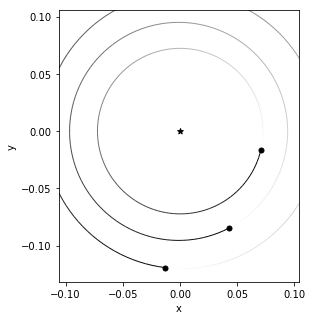

In [16]:
fig = rebound.OrbitPlot(sim)

In [17]:
model = StabilityClassifier()

/storage/home/cjg66/miniconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.21.2 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [18]:
model.predict(sim)

0.907911479473114

j:j-k

In [19]:
from celmech import Andoyer

avars = Andoyer.from_Simulation(sim, j=3, k=1, i1=1, i2=2)
avars.Z

0.011840965987056393

In [20]:
avars = Andoyer.from_Simulation(sim, j=7, k=2, i1=2, i2=3)
avars.Z

0.019329183572651544

In [21]:
def varyZ(sim0, Z12, Z23):
    ps0 = sim0.particles
    sim = rebound.Simulation()
    sim.units = ('Msun','days','AU')
    sim.add(m=1)
    sim.add(m=ps0[1].m, a=ps0[1].a, l=ps0[1].l, e=Z12, pomega=0)
    sim.add(m=ps0[2].m, a=ps0[2].a, l=ps0[2].l, e=0, pomega=0)
    sim.add(m=ps0[3].m, a=ps0[3].a, l=ps0[3].l, e=Z23, pomega=0)
    sim.move_to_com()
    sim.integrator = 'whfast'
    sim.ri_whfast.safe_mode = 0
    set_timestep(sim,1/30)
    set_min_distance(sim,1)
    return sim

In [22]:
sim = dfrow_to_sim(df.iloc[1],npl)
sim = varyZ(sim, 0.7, 0.7)

In [23]:
P0 = sim.particles[1].P
sim.integrate(1e9*P0)

Encounter: Two particles had a close encounter (d<exit_min_distance).

In [24]:
sim.t/P0

657.0072145822896

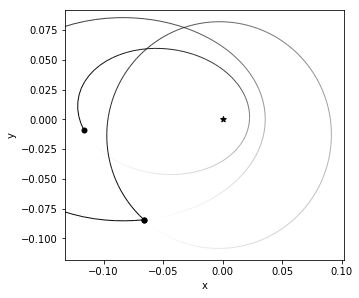

In [25]:
fig = rebound.OrbitPlot(sim)

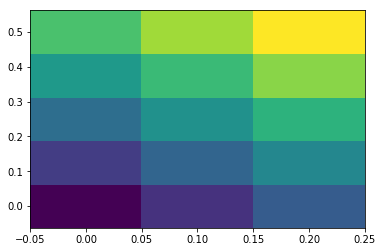

In [26]:
e1 = np.linspace(0, 0.2, 3)
e3 = np.linspace(0, 0.5, 5)

de1 = e1[1]-e1[0]
de3 = e3[1]-e3[0]

# pcolormesh takes the boundaries of each cell in X and Y, so need to offset by half dX, and add one at end at X[-1]+dX/2
e1g = [e - de1/2 for e in e1] + [e1[-1]+de1/2]
e3g = [e - de3/2 for e in e3] + [e3[-1]+de3/2]

X, Y = np.meshgrid(e1g, e3g)

Z = np.zeros((len(e3), len(e1))) # shape = (rows, col) so (Y,X)
for i, e1v in enumerate(e1):
    for j, e3v in enumerate(e3):
        Z[j,i] = e1v + e3v

z_min, z_max = -abs(Z).max(), abs(Z).max()

fig, ax = plt.subplots()
im = ax.pcolormesh(X, Y, Z)

In [246]:
%%time

Ne1 = 30
Ne3 = 30
e1max = 0.5
e3max = 0.5

e1 = np.linspace(0, e1max, Ne1)
e3 = np.linspace(0, e3max, Ne3)

de1 = e1[1]-e1[0]
de3 = e3[1]-e3[0]

# pcolormesh takes the boundaries of each cell in X and Y, so need to offset by half dX, and add one at end at X[-1]+dX/2
e1g = [e - de1/2 for e in e1] + [e1[-1]+de1/2]
e3g = [e - de3/2 for e in e3] + [e3[-1]+de3/2]

X, Y = np.meshgrid(e1g, e3g)

Z = np.zeros((Ne3, Ne1)) # shape = (rows, col) so (Y,X)
for i, e1v in enumerate(e1):
    for j, e3v in enumerate(e3):
        sim = dfrow_to_sim(df.iloc[0],npl)
        sim = varyZ(sim, e1v, e3v)
        Z[j,i] = model.predict(sim)

z_min, z_max = -abs(Z).max(), abs(Z).max()

CPU times: user 1h 11min 19s, sys: 1min 36s, total: 1h 12min 56s
Wall time: 15min 56s


Text(0, 0.5, 'e3')

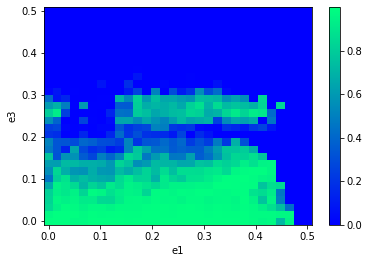

In [247]:
fig, ax = plt.subplots()
im = ax.pcolormesh(X, Y, Z, cmap='winter')
fig.colorbar(im)
ax.set_xlabel('e1')
ax.set_ylabel('e3')